<h1>Counterfactual Mean Embedding : Simulation</h1>

In [1]:
# The goal of this code is to simulate the data from counterfactual distributions and to 
# perform the causal inference using counterfactual mean embedding. We first assume two random 
# variables X_j and Y_j where =0,1. The data are generated according to P(X_j) and P(Y_j|X_j) 
# for each j=0,1. The goal is to estimate the the counterfactual distribution
#
#   P(Y_1) = \int P(Y_0 | X_0) dP(X_1)
#
# or vice versa, using the kernel mean embedding and then to compare with classical approaches 
# on synthetic data set.
#
# written by Krikamol Muandet on December 17, 2015. Last update : February 4, 2016

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from scipy.spatial.distance import cdist
from numpy.polynomial.polynomial import polyval

%matplotlib inline

In [37]:
# generate data from the marginal distributions P(X_0) and P(X_1)
ns = 300
X0 = np.random.randn(ns,1)
X1 = 2+np.random.randn(ns,1)

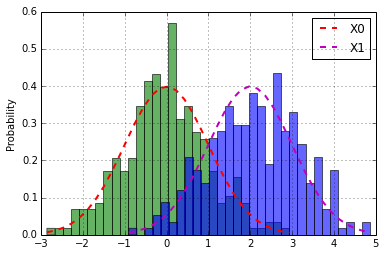

In [40]:
# plot the marginals
n, bins, patches = plt.hist(X0,30,normed=1,facecolor='green', alpha=0.6)
y = mlab.normpdf(bins, 0, 1)
l = plt.plot(bins, y, 'r--', linewidth=2,label='X0')

n, bins, patches = plt.hist(X1,30,normed=1,facecolor='blue', alpha=0.6)
y = mlab.normpdf(bins, 2, 1)
l = plt.plot(bins, y, 'm--', linewidth=2,label='X1')

plt.legend()
plt.ylabel('Probability')
plt.grid(True)

In [57]:
# generate Y_0 and Y_1 from the conditional models, assumed to be polynomial 
# functions plus some i.i.d. noise
C0 = [1.2, 2.3, 0.5]
C1 = [1.5, 2.5, 0.2]

Y0 = polyval(X0,C0) + np.random.randn(len(X0),1)
Y1 = polyval(X1,C1) + np.random.randn(len(X1),1)

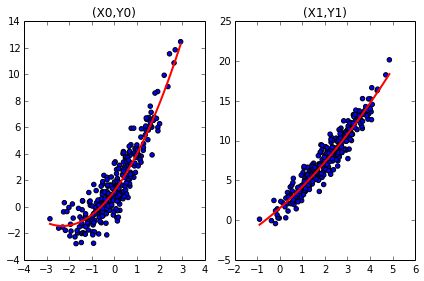

In [75]:
# plot the true functions and the samples
fig,ax = plt.subplots(1,2)

x_tmp = np.linspace(np.min(X0),np.max(X0),100)
ax[0].plot(x_tmp,polyval(x_tmp,C0),linewidth=2,color='red')
ax[0].scatter(X0,Y0)
ax[0].set_title("(X0,Y0)")

x_tmp = np.linspace(np.min(X1),np.max(X1),100)
ax[1].plot(x_tmp,polyval(x_tmp,C1),linewidth=2,color='red')
ax[1].scatter(X1,Y1)
ax[1].set_title("(X1,Y1)")

fig.tight_layout()

In [87]:
# kernel function
def gauss_rbf(X1,X2,sigma=1):
    """
    The Gaussian RBF kernel function.
    X1 : the first nxd input data matrix. Each row corresponds to data point
    X2 : the second mxd input data matrix. Each row corresponds to the data point
    """
    
    K = np.exp(-np.divide(cdist(X1,X2,'sqeuclidean'),sigma))
    
    return K
###

In [96]:
# Now, given the generated data, construct the estimate of the counterfactual distributions

reg_param = 1e-5

sg = 0.1

K1 = gauss_rbf(X1,X1,sg)
K2 = gauss_rbf(X1,X0,sg)

b = np.dot(np.dot(np.linalg.inv(K1 + ns*reg_param*np.eye(ns)),K2),np.ones((ns,1))/ns)

In [ ]:
# treat the estimate as an estimate of the density and plot

In [113]:
def counterfactual_density(bvec,Y,Yt,sigma=1):
    """
    Evaluate the counterfactual density function.
    
    bvec : the coefficient vector
    Y    : the nxd training data matrix. Each row corresponds to data point.
    Yt   : the mxd data matrix of points at which we want to evaluate.
    sigma : bandwidth parameter
    """
    
    L = gauss_rbf(Y,Yt,sigma)
    fvals = np.dot(bvec.T, L)
    
    return fvals.T

In [119]:
Yt = np.linspace(-10,10,100)
Yt = Yt[:,np.newaxis]
fv = counterfactual_density(b,Y1,Yt,sg)

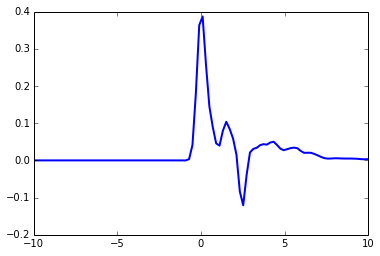

In [125]:
plt.plot(Yt,fv,linewidth=2);

In [ ]:
# also plot the counterfactual obtained from the estimate